# IMDB Movies Analysis

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./imdb_movies.csv')
df.head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
5,Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
6,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
7,Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
8,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US
9,The Park,03/02/2023,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US


In [3]:
df.shape

(10178, 12)

Use .info() to understand the data types and missing values. What potential issues can you spot?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


The date_x column needs to be converted to datetime, and the crew and genre columns contain null values that need to be addressed.

Describe the main characteristics of each column using .describe(). What can you infer from the mean, median, and distribution of numerical columns?

In [5]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


While the `budget_x` and `revenue` columns contain outliers due to some movies having significantly large budgets and box office revenues, the `score` column displays a largely normal distribution.

Which columns contain missing values? How would you handle them?

The `crew` and `genre` columns have null values. Since this is publicly available data, we have the option to either scrape the data or utilize the IMDB API to update these null values but for now we'll fill them with 'Unknown'

In [6]:
df['crew'] = df['crew'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')

Are there any columns where data types need conversion (e.g., date, ratings)? Explain your decision.

The `date_x` column needs to be converted into datetime from object.

In [7]:
df['date_x'] = pd.to_datetime(df['date_x'])

## Univariate Analysis

What is the distribution of movie runtimes? Plot a histogram and describe its shape.

(array([ 211.,   33.,   36.,   75.,  450., 1894., 4184., 2864.,  411.,
          20.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

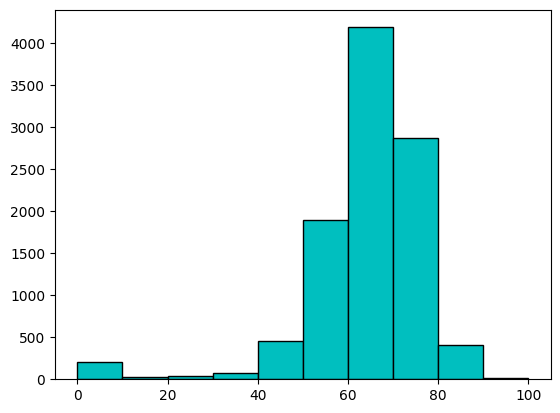

In [8]:
plt.hist(df['score'], bins=10, color='c', edgecolor='black')

What are the most common genres in the dataset? Use a bar chart to show their distribution.

The most common genre is Drama with 556 movies


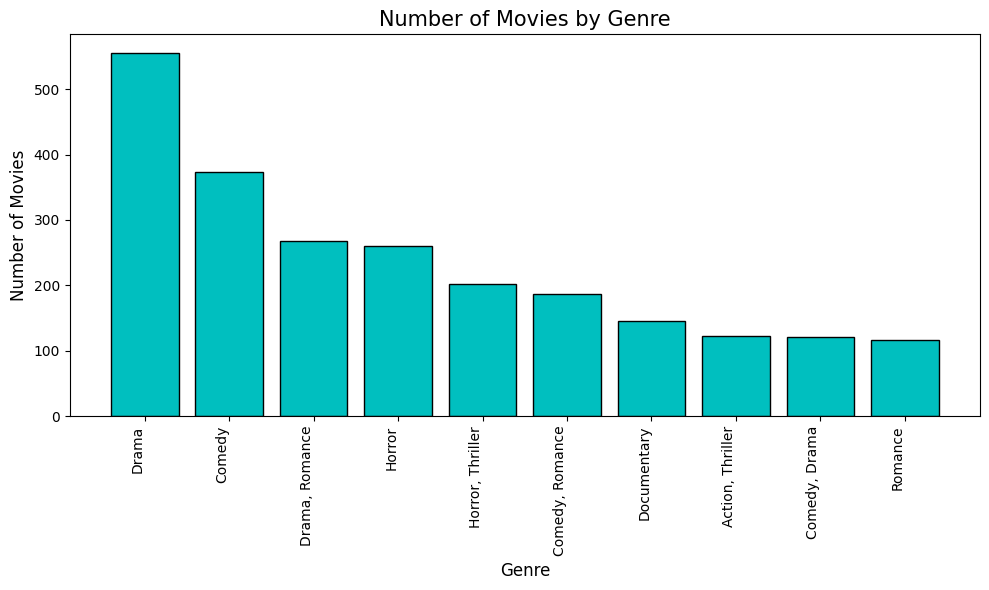

In [9]:
gb = df.groupby('genre').agg({'names': 'count'}).reset_index()
gb = gb.sort_values(by='names', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(gb['genre'], gb['names'], color='c', edgecolor='black')

plt.title('Number of Movies by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

print(f'The most common genre is {gb.iloc[0, 0]} with {gb.iloc[0, 1]} movies')


## Bivariate Analysis

Is there a correlation between budget and revenue? Create a scatter plot and calculate the correlation coefficient. What can you conclude?

The correlation between budget and revenue is 0.6738295691763745, indicating a positive correlation


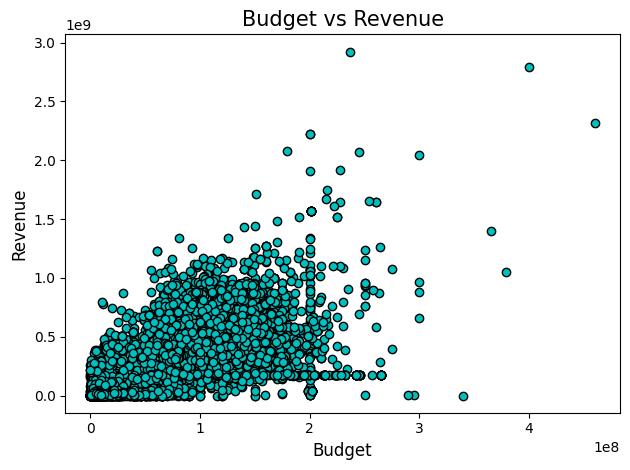

In [10]:
plt.scatter(df['budget_x'], df['revenue'], c='c', edgecolor='black')
plt.title('Budget vs Revenue', fontsize=15)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.tight_layout()

print(f'The correlation between budget and revenue is {df["budget_x"].corr(df["revenue"])}, indicating a positive correlation')

How do ratings vary by genre? Use a boxplot to visualize the differences in ratings across genres.

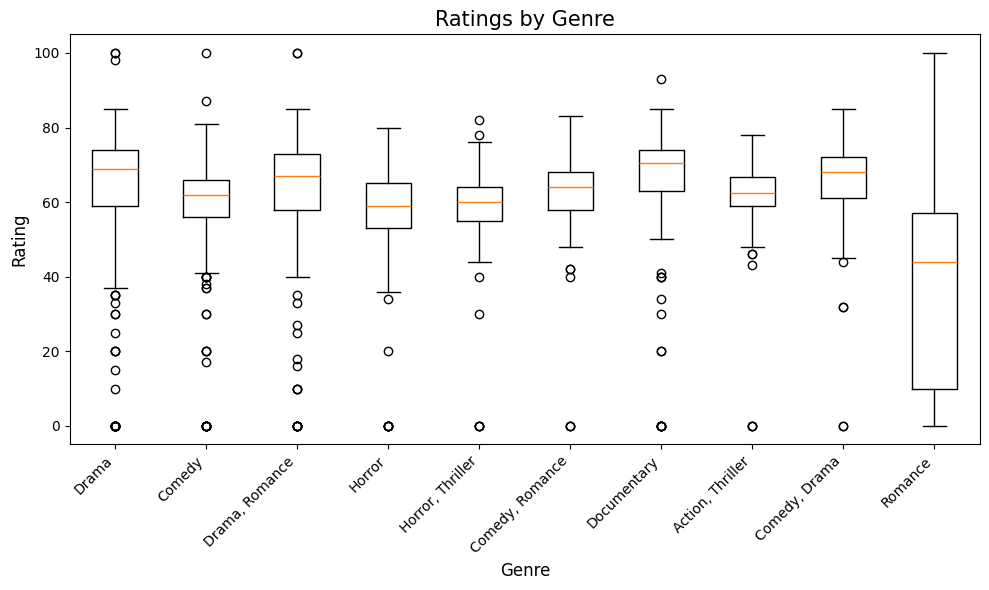

In [11]:
# How do ratings vary by genre? Use a boxplot to visualize the differences in ratings across genres.
plt.figure(figsize=(10, 6))
plt.boxplot(x=[df[df['genre'] == genre]['score'] for genre in gb['genre'].head(10)], tick_labels=gb['genre'].head(10))
plt.title('Ratings by Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Genre-Specific Analysis

Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.

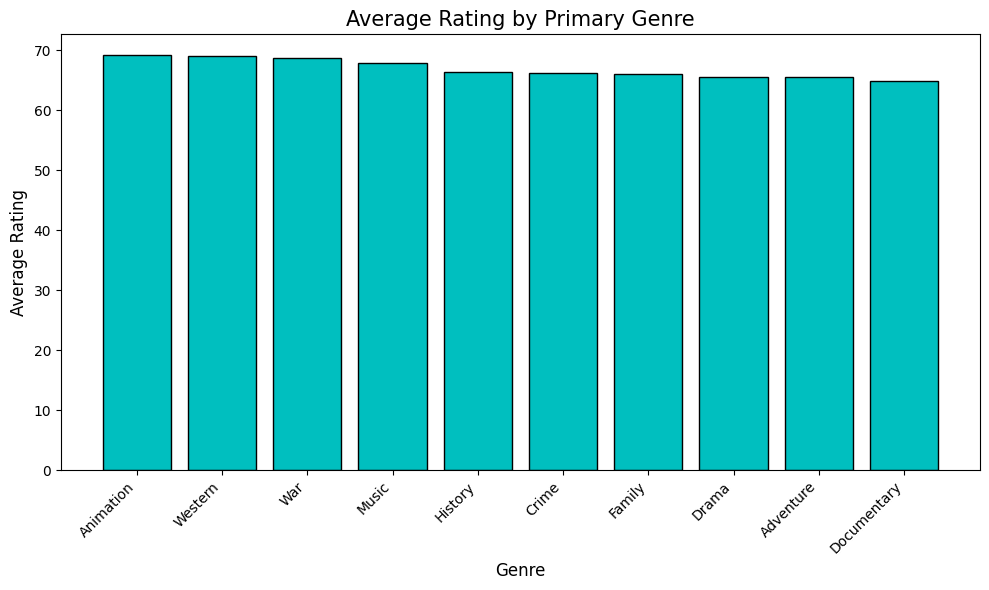

In [12]:
df['primary_genre'] = df['genre'].str.split(',').str[0]

genre_ratings = df.groupby('primary_genre').agg({'score': 'mean'}).reset_index()

genre_ratings = genre_ratings.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(genre_ratings['primary_genre'], genre_ratings['score'], color='c', edgecolor='black')

plt.title('Average Rating by Primary Genre', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

Animation has the highest average rating

How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

<Figure size 1200x800 with 0 Axes>

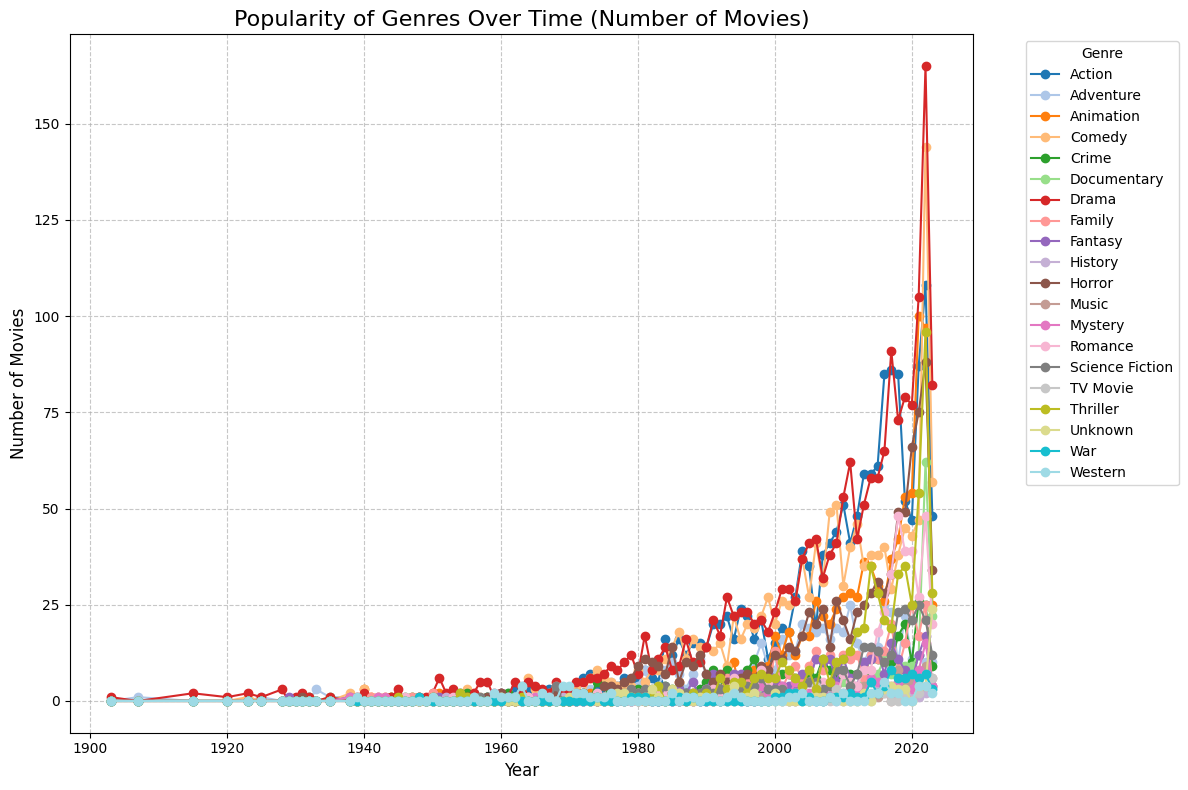

In [17]:
df['year'] = pd.to_datetime(df['date_x']).dt.year

genre_per_year = df.groupby(['year', 'primary_genre']).agg({'names': 'count'}).reset_index()
pivot_data = genre_per_year.pivot(index='year', columns='primary_genre', values='names').fillna(0)

plt.figure(figsize=(12, 8))
pivot_data.plot(kind='line', figsize=(12, 8), marker='o', colormap='tab20')

plt.title('Popularity of Genres Over Time (Number of Movies)', fontsize=16)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

## Year and Trend Analysis

How has the average movie rating changed over the years? Plot the average rating for each year.

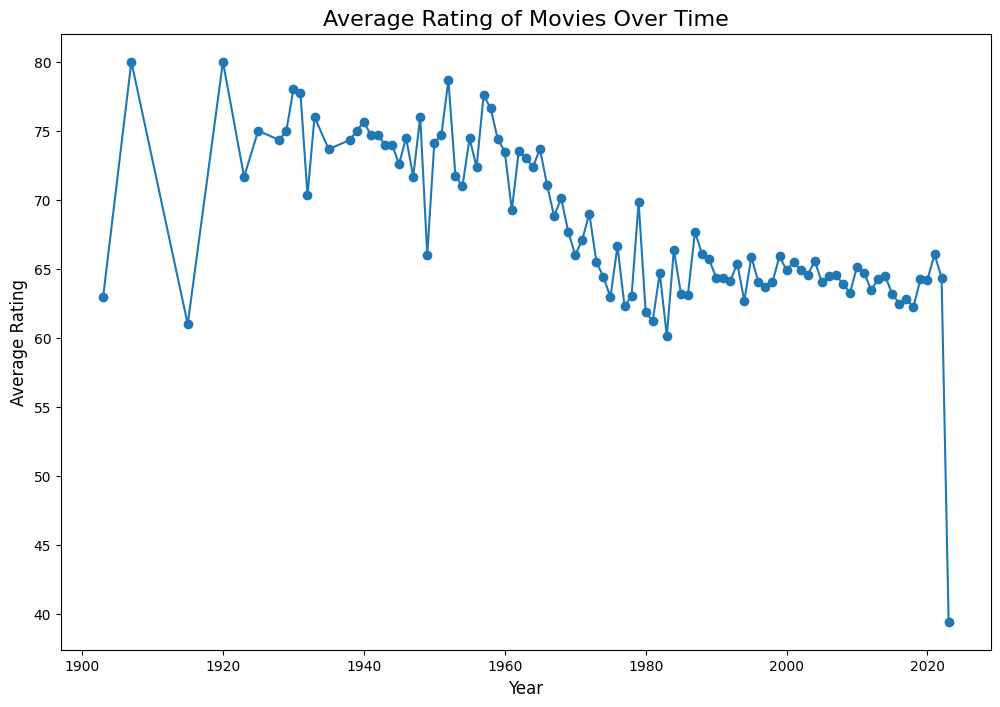

In [20]:
avg_rating_per_year = df.groupby('year').agg({'score': 'mean'}).reset_index()

plt.figure(figsize=(12, 8))

plt.title('Average Rating of Movies Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.plot(avg_rating_per_year['year'], avg_rating_per_year['score'], marker='o')

Here we see a sudden dip in 2020 due to Covid-19

Which years had the highest and lowest number of movie releases? Plot the number of movies released each year.

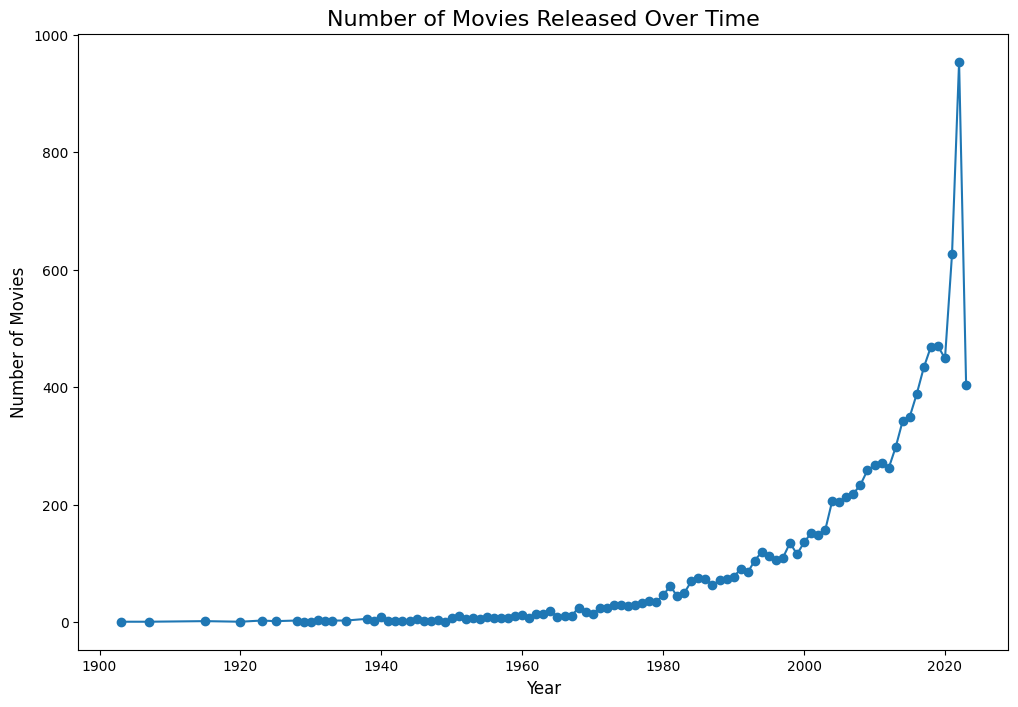

In [57]:
movies_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.title('Number of Movies Released Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.plot(movies_per_year.index, movies_per_year.values, marker='o')

There has been a steady increase in number of movies released.

## Multivariate Analysis: Analyze multiple variables together

Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

<Figure size 1200x800 with 0 Axes>

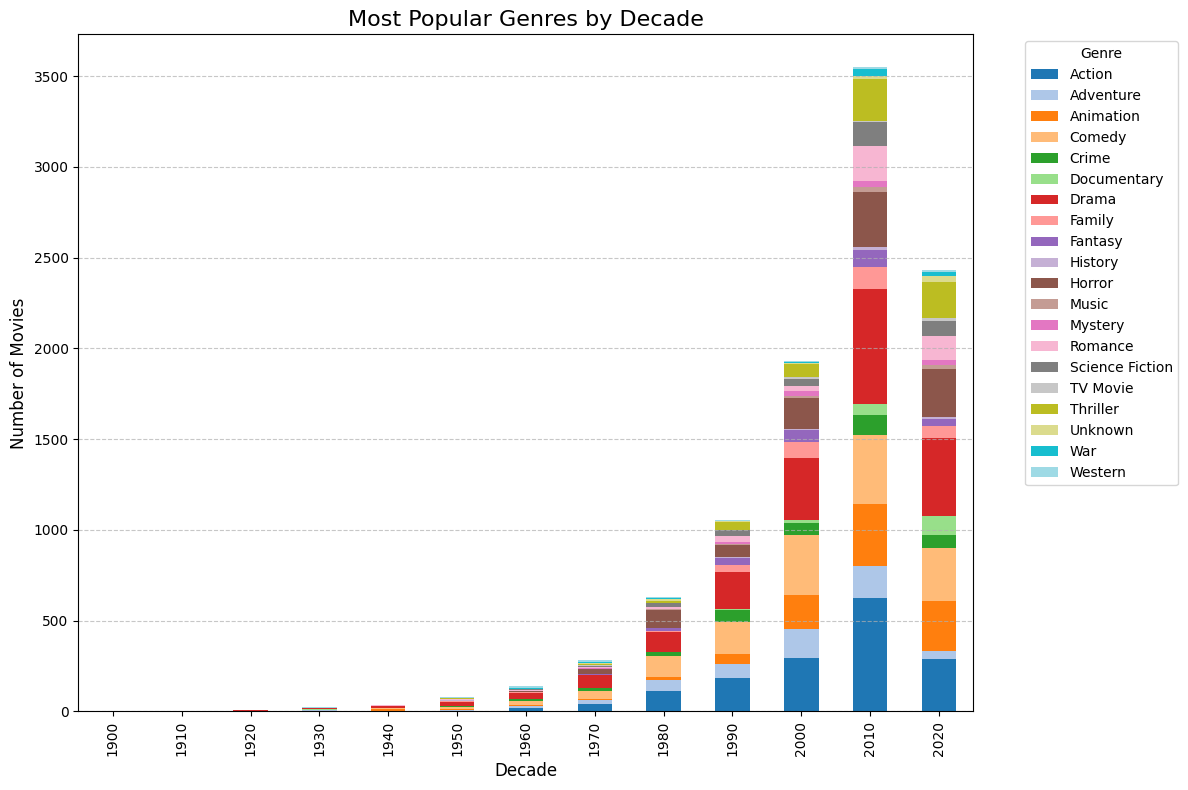

In [24]:
popular_genre_decade = df.groupby(['year', 'primary_genre']).agg({'names': 'count'}).reset_index()

popular_genre_decade['decade'] = (popular_genre_decade['year'] // 10) * 10

pivot_data_decade = popular_genre_decade.groupby(['decade', 'primary_genre']).agg({'names': 'sum'}).reset_index()

pivot_data_decade = pivot_data_decade.pivot(index='decade', columns='primary_genre', values='names').fillna(0)

plt.figure(figsize=(12, 8))
pivot_data_decade.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

plt.title('Most Popular Genres by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Plot a heatmap or pairplot to examine relationships between budget, revenue, scores.

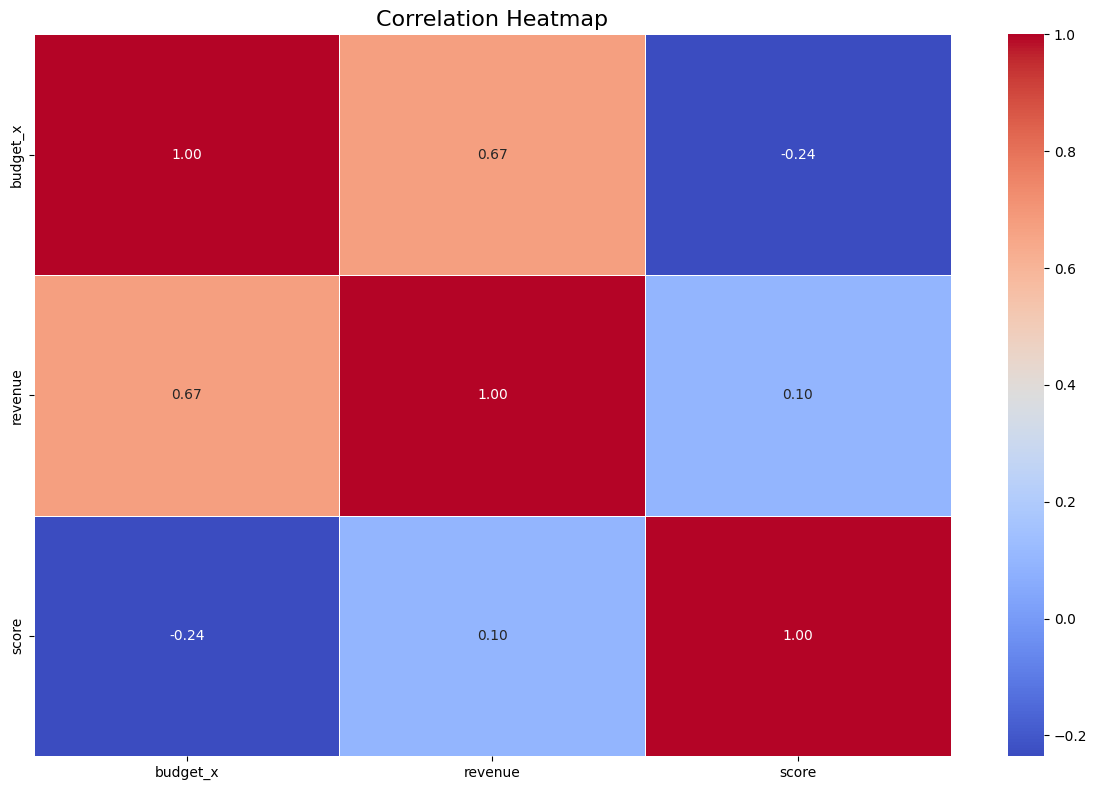

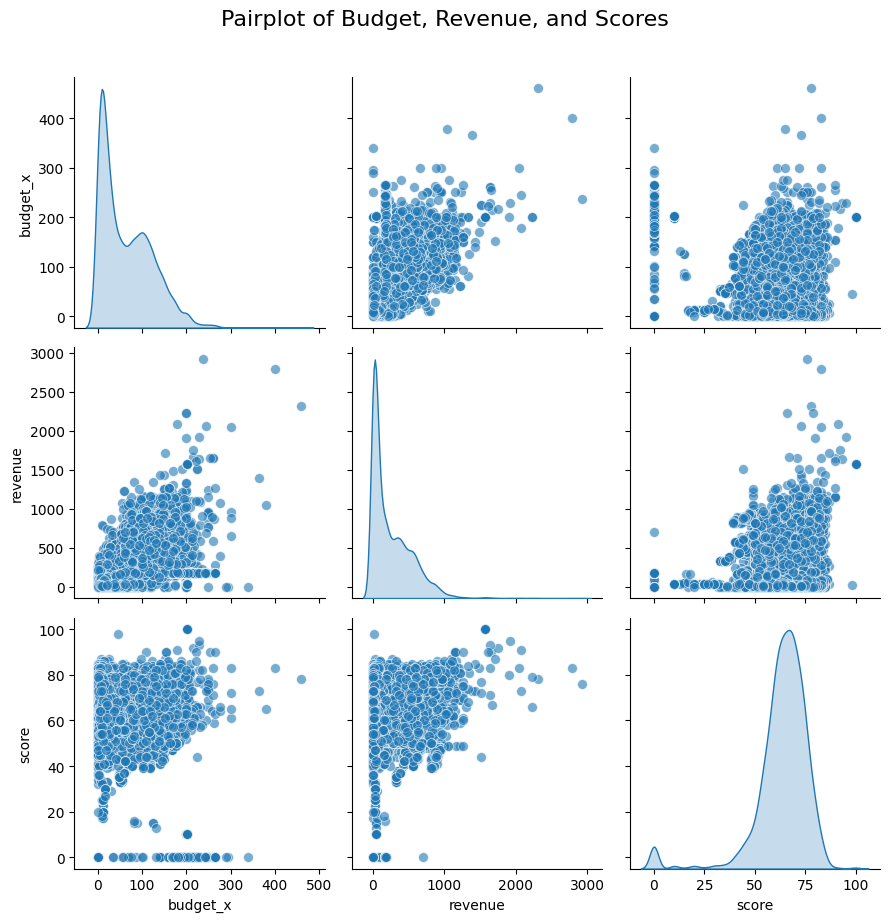

In [39]:
numerical_df = df[['budget_x', 'revenue', 'score']].copy()
numerical_df['budget_x'] = numerical_df['budget_x'] / 1e6
numerical_df['revenue'] = numerical_df['revenue'] / 1e6
numerical_df = numerical_df.dropna()

# Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Pairplot of Budget, Revenue, and Scores
sns.pairplot(
    numerical_df, 
    diag_kind='kde', 
    kind='scatter', 
    height=3, 
    plot_kws={'alpha': 0.6, 's': 50},
)
plt.suptitle('Pairplot of Budget, Revenue, and Scores', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Are there specific genres or release years with higher-rated movies? Group by genre and year, then analyze the average rating.

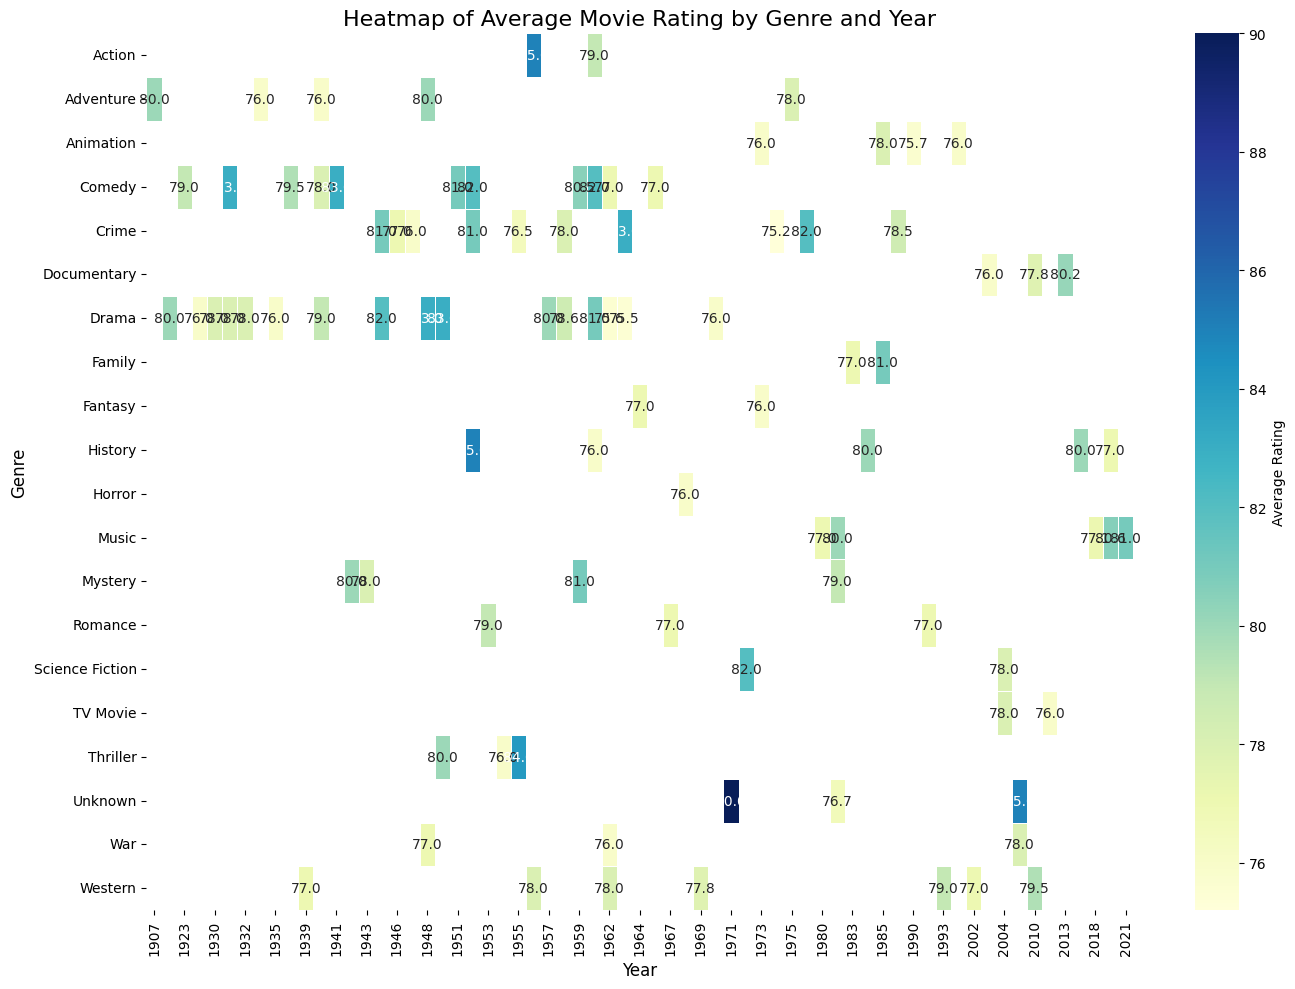

In [ ]:
high_rated_movies = df.groupby(['primary_genre', 'year']).agg({'score': 'mean'}).reset_index()
high_rated_movies = high_rated_movies[high_rated_movies['score'] > 75]

genre_year_avg = high_rated_movies.pivot_table(values='score', index='primary_genre', columns='year', aggfunc='mean')

plt.figure(figsize=(14, 10))
sns.heatmap(genre_year_avg, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Average Rating'})
plt.title('Heatmap of Average Movie Rating by Genre and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()

## Insights and Summary



Based on your analysis, what are three major insights you learned about movie trends, popular genres, or movie ratings?

1. Drama is the most popular genre.
2. Animation has the highest average rated movies.
3. The number of movies releaed each year has been increasing.
4. Higher the budget more the movie collects at the box office.

What additional questions could be explored with this dataset, or what other data would be helpful to gain a deeper understanding?

1. Other data such as director, lead actor and actress can help us to find out induvisual's ability to provide hits.
2. The genre can be divided to primary and secondary genre to help us analyse more efficiently